In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import PIL
import cv2 
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,MaxPooling2D,Conv2D,Dropout,Activation,BatchNormalization
from tensorflow.keras.preprocessing import image
from sklearn.metrics import classification_report,confusion_matrix
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
train_dir = ("../input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/train")
test_dir = ("../input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test")
classes_train =os.listdir(train_dir)
classes_test =os.listdir(test_dir)
classes_train

['PNEUMONIA', 'NORMAL']

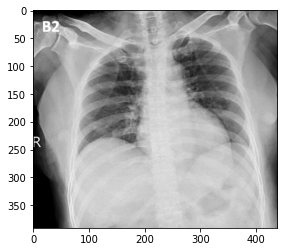

In [3]:
plt.imshow(cv2.imread("../input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/train/PNEUMONIA/1-s2.0-S1684118220300682-main.pdf-003-b2.png"))

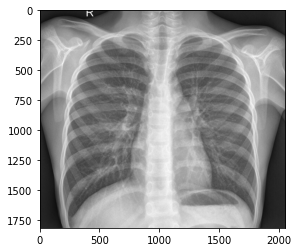

In [4]:
plt.imshow(cv2.imread("../input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/train/NORMAL/IM-0007-0001.jpeg"))

In [5]:
train_datagen=ImageDataGenerator(
    #zoom_range=0.2, #the amount of zooming u need
    horizontal_flip=True, # Make a horizontal copy of image
    rescale=1/255, # Normalize the new images
    width_shift_range=0.10, # The percentage of Width shifitning
    height_shift_range=0.10, # The percentage of height shifitning
    shear_range=0.1, #Shear angle in counter-clockwise direction in degrees
    fill_mode='nearest',
    rotation_range=20, 
)
train_generator=train_datagen.flow_from_directory(
    train_dir,
    class_mode='binary',
    color_mode='rgb',
    batch_size= 16,
    target_size=(1000,1000,3)[:2]
)

test_datagen=ImageDataGenerator(rescale=1/255)
test_generator=test_datagen.flow_from_directory(
    test_dir,
    class_mode='binary',
    color_mode='rgb',
    batch_size=16,
    target_size=(1000,1000,3)[:2]
)

Found 148 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [6]:
earlystop=EarlyStopping(patience=6)
learning_rate_reduction=ReduceLROnPlateau(
    monitor='val_acc',
    patience= 3,
    verbose=1,
    factor=0.5,
    min_lr=0.00001
)
callbacks = [earlystop, learning_rate_reduction]

In [7]:
model=Sequential() 

model.add(Conv2D(32,(2,2),activation='relu',input_shape=(1000,1000,3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(2,2),activation='relu'))
model.add(MaxPooling2D(3,3))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(3,3))

model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(128,activation='relu'))

model.add(Dropout(0.4))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam' ,loss='binary_crossentropy',metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 999, 999, 32)      416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 499, 499, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 498, 498, 64)      8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 166, 166, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 164, 164, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 186624)            0

In [9]:
model.fit(
    train_generator, 
    epochs=14,
    validation_data=test_generator,
    callbacks=callbacks
)

Epoch 1/14
10/10 [==============================] - 47s 4s/step - loss: 1.9128 - accuracy: 0.5743 - val_loss: 0.6842 - val_accuracy: 0.5000
Epoch 2/14
10/10 [==============================] - 38s 4s/step - loss: 0.6606 - accuracy: 0.6081 - val_loss: 0.4518 - val_accuracy: 0.9750
Epoch 3/14
10/10 [==============================] - 37s 4s/step - loss: 0.5018 - accuracy: 0.7703 - val_loss: 0.1090 - val_accuracy: 1.0000
Epoch 4/14
10/10 [==============================] - 38s 4s/step - loss: 0.3951 - accuracy: 0.8243 - val_loss: 0.1206 - val_accuracy: 0.9750
Epoch 5/14
10/10 [==============================] - 38s 4s/step - loss: 0.3219 - accuracy: 0.8378 - val_loss: 0.1270 - val_accuracy: 0.9750
Epoch 6/14
10/10 [==============================] - 38s 4s/step - loss: 0.2724 - accuracy: 0.8919 - val_loss: 0.0721 - val_accuracy: 0.9750
Epoch 7/14
10/10 [==============================] - 38s 4s/step - loss: 0.3324 - accuracy: 0.8446 - val_loss: 0.1720 - val_accuracy: 0.9750
Epoch 8/14
10/10 [==

<AxesSubplot:>

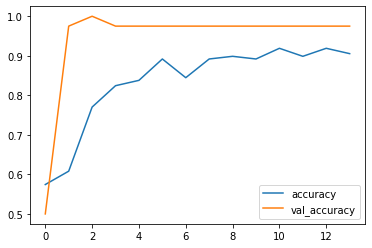

In [10]:
losses = pd.DataFrame(model.history.history)
losses[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

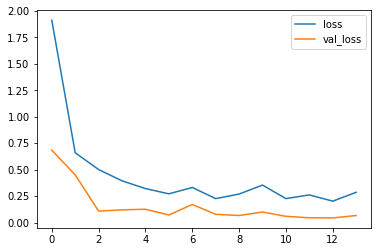

In [11]:
losses[['loss','val_loss']].plot()

In [12]:
model.evaluate(test_generator)

3/3 [==============================] - 2s 546ms/step - loss: 0.0671 - accuracy: 0.9750


[0.067093625664711, 0.9750000238418579]

In [13]:
real = test_generator.classes
real

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [14]:
predictions = model.predict_generator(test_generator) > 0.5
predictions

array([[False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True]])

AxesSubplot(0.241667,0.125;0.503333x0.755)
report :               precision    recall  f1-score   support

           0       0.38      0.40      0.39        20
           1       0.37      0.35      0.36        20

    accuracy                           0.38        40
   macro avg       0.37      0.38      0.37        40
weighted avg       0.37      0.38      0.37        40



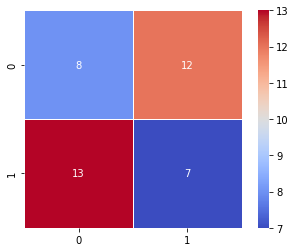

In [15]:
con = confusion_matrix(real, predictions)
print(sns.heatmap(con,cmap="coolwarm" ,annot=True,fmt="d",linewidths=1 ,square= True))
print('report :',classification_report(real, predictions ))

In [16]:
predict_path='/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0059-0001.jpeg'
my_image = image.load_img(predict_path,target_size=(1000,1000,3))

In [17]:
my_image = np.expand_dims(my_image,axis = 0)

In [18]:
np.argmax(model.predict(my_image))

0